/Users/oliviawren/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


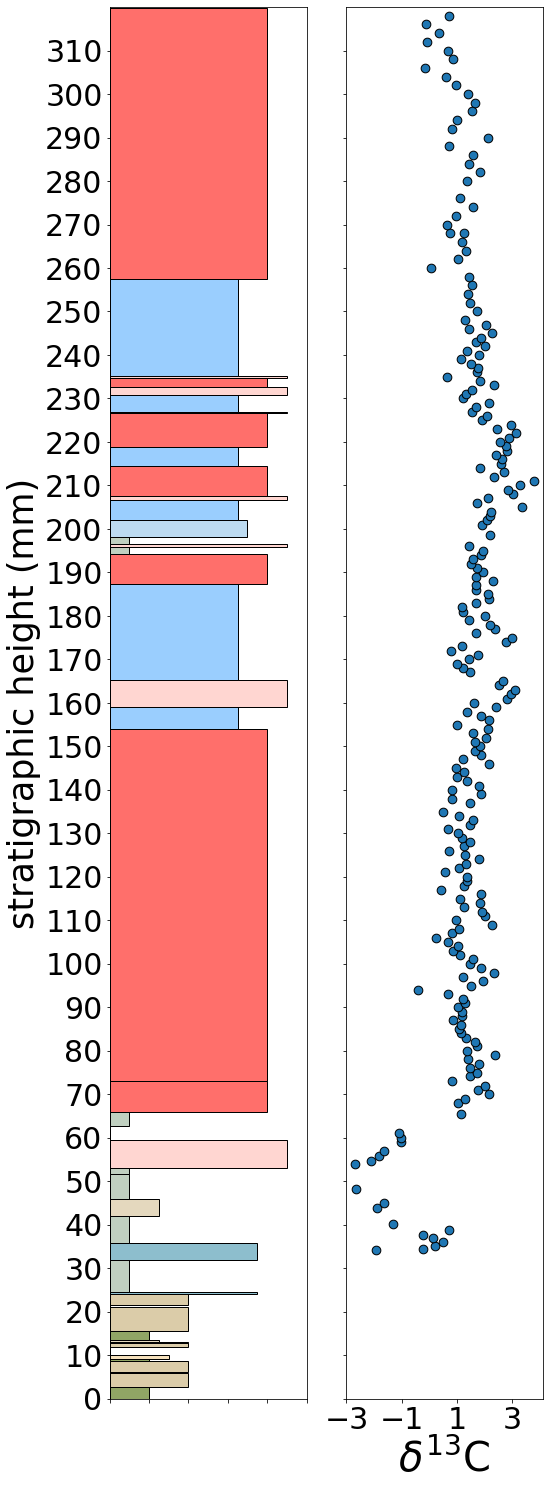

In [6]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import pandas as pd

tmp=pd.read_table('https://mrdata.usgs.gov/catalog/lithrgb.txt',sep='\t')
usgs_liths=dict()
for i,lith in tmp.iterrows():
    usgs_liths[lith['text'].lower()]='#{:02x}{:02x}{:02x}'.format( lith['r'], lith['g'] , lith['b'] )

cnames=colors.cnames
#MAGIC! 
def getKey(item):
    return item[1]
    
#MAKE A STRATIGRAPHIC LITHOLOGY KEY
def stratkey(ax, strat_style):
    
    boxes=[]
    for k in strat_style.keys():
        boxes.append(strat_style[k])
    
    boxes=list(set(boxes))
    boxes=sorted(boxes,key=getKey)
    
    h=1/float(len(boxes))
    stack=0
    for b in boxes:
        rect = patches.Rectangle((0, stack),  b[1], h,
          facecolor=b[0],edgecolor="k")
        stack=stack+h
        ax.add_patch(rect)
        label=','.join([k for k in strat_style if strat_style[k]==b])
        ax.text(1.3,stack-h/2,label,transform=ax.transAxes,horizontalalignment='right',verticalalignment='center')
    
    ax.text(0.5,1.05,'lithostratigraphic key',transform=ax.transAxes,fontweight='bold',horizontalalignment='center')
    ax.axis('off')
    ##MAKE SIMPLE STRATIGRAPHIC COLUMNS 
def pystrat(ax,strat,style,jitter,draw_trace):
    strat=strat[np.isnan(strat['thickness'])==False]
    stack=0
    stack_max=sum(strat['thickness'])
    
    ax.axis([0, 1, 0,stack_max])
    
    trace=[]
    for i,s in strat.iterrows():
        
        if s['facies'] in style.keys():
            w=style[s['facies']][1]
            c=style[s['facies']][0]
        else:
            w=1
            c='black'
            
        jitter_y=[]
        jitter_x=[]
        
        if w!=0:
            jitter_y=np.arange(stack+jitter['y']/2,stack+s['thickness'],jitter['y'])
            jitter_w=np.linspace(w-jitter['spread'],w+jitter['spread'],len(jitter_y)+2)
            jitter_x=np.random.uniform(-1*jitter['x'],jitter['x'],len(jitter_y))+jitter_w[1:-1]
            
        if len(jitter_y)==0:
            w_box=[w,w]
        else:
            w_box=[w-jitter['spread'],w+jitter['spread']]
            
        xy=np.array([(0,stack),
                     (w_box[0],stack)]
                     +list(zip(jitter_x,jitter_y))
                     +[(w_box[1],stack+s['thickness']),
                     (0,stack+s['thickness'])])
    
        rect = Polygon(xy,closed=True,
                          facecolor=c,edgecolor="k")
        
        ax.add_patch(rect)
        
        trace.extend([(w_box[0],stack)]
                     +list(zip(jitter_x,jitter_y))
                     +[(w_box[1],stack+s['thickness'])])
    
        stack=stack+s['thickness']
        
    ax.plot([0,0],[0,stack_max],lw=1,color='k')
    ax.plot([0,1],[0,0],lw=1,color='k')
    
    if draw_trace['on']:
        ax.plot([t[0] for t in trace],[t[1] for t in trace],'k-',lw=draw_trace['lw'])
    ax.axis('on')
#%% STRATIGRAPHIC PLOT OF DATA
fig=plt.figure(3,figsize=(12,25.6))
ax = fig.add_subplot(131,)
axb = fig.add_subplot(132,)
# axc = fig.add_subplot(133)
strat=pd.read_csv('FW1.csv')
strat=pd.read_excel('ALL_FW_DATA.xlsx',sheet_name='FW1')
strat_style={'siltstone': (usgs_liths['medium-grained mixed clastic rock'], 0.2),
             'fine sandstone': (usgs_liths['beach sand'], 0.25),
             'medium sandstone': (usgs_liths['loess'], 0.3),
             'coarse sandstone': (usgs_liths['sand sheet'], 0.4),
             'cover': (cnames['white'], 0),
             'dolostone': (usgs_liths['calcarenite'], 0.65),
             'grainstone': (usgs_liths['olistostrome'], 0.75),
             'wackestone': (usgs_liths['wacke'], 0.7),
             'mudstone': (usgs_liths['bentonite'], 0.1),
             'stromatolite': (usgs_liths['norite'], 0.9),
             'limestone': (cnames['lightsteelblue'], 0.55),
             'oncolite': (usgs_liths['subaluminous granite'], 0.8),
            'intraclast breccia': (usgs_liths['coal'], 1)}
pystrat(ax,strat,strat_style,
        jitter={'y':1, 'x': 0,'spread':0},
        draw_trace={'on':False,'lw':1})
ax.set_ylabel('stratigraphic height (mm)',fontsize=35)
axb.scatter(x=strat['d13c_carb'],y=strat['sample_height'],edgecolor='k',s=75)
# axc.scatter(x=strat['d18o_carb'],y=strat['sample_height'],edgecolor='k',s=75)
#axc.scatter... #oxygen
axb.set_xlabel('$\delta^{13}$C',fontsize=40)
# axc.set_xlabel('$\delta^{18}$O',fontsize=40)

ax.set_yticks(np.arange(0,320,10))
ax.tick_params(axis='y', labelsize=30 )
axb.set_yticks(np.arange(0,300,10))
axb.tick_params(axis='x', labelsize=30 )
# axc.tick_params(axis='x', labelsize=30 )


axb.set_yticks(np.arange(0,320,10))
axb.set_yticklabels([])
# axc.set_yticks(np.arange(0,320,10))
# axc.set_yticklabels([])
ax.set_xticklabels([])

# axc.set_xticks(np.arange(-10,1,3))
axb.set_xticks(np.arange(-3,4,2))
ax.set_ylim(0,320)
axb.set_ylim(0,320)
# axc.set_ylim(0,320)

plt.savefig('FW1.pdf')


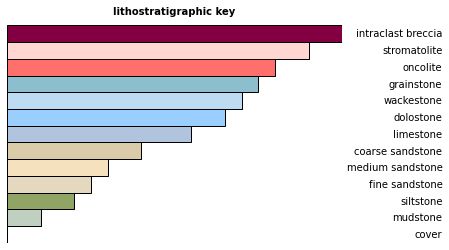

In [9]:
fig,ax = plt.subplots(1,1)
stratkey(ax,strat_style)
plt.savefig('lithokey_FW12.pdf')

Text(0.5, 1.0, 'FW1')

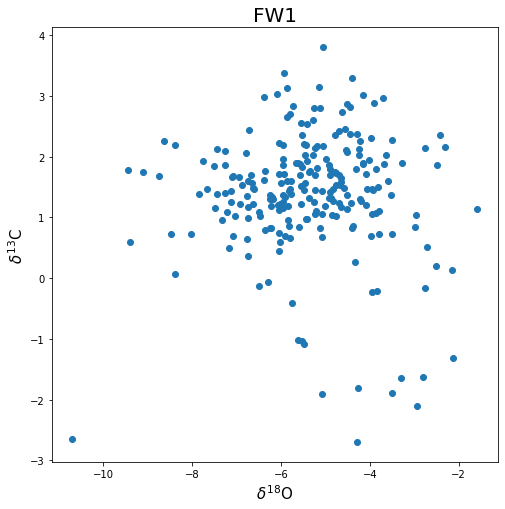

In [33]:
#carbon oxygen crossplot
x=strat['d18o_carb']
y=strat['d13c_carb']
plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.xlabel('$\delta^{18}$O',fontsize=15)
plt.ylabel('$\delta^{13}$C',fontsize=15)
plt.title('FW1',fontsize=20)

In [6]:
# rose diagram
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
!pip install windrose openpyxl
from windrose import WindroseAxes


ValueError: var and direction must have same length

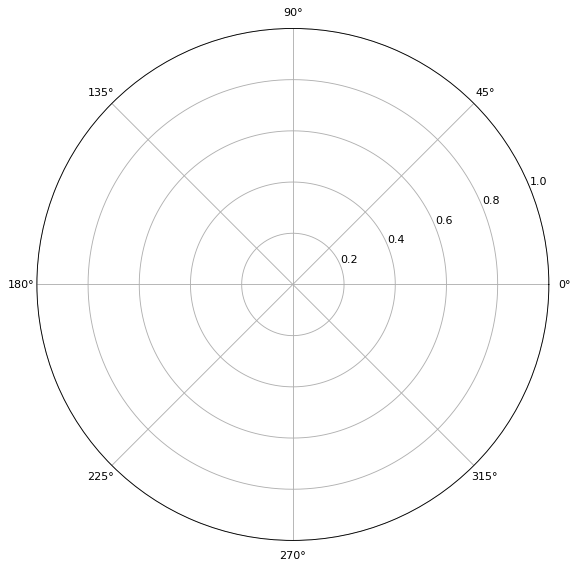

In [32]:
df = pd.read_csv('paleocurrent.csv')

ax = WindroseAxes.from_ax()
ax.bar(df.dip_direction,df.velocity, normed=True, opening=0.8, edgecolor='white')
ax.bar??

Text(0.5, 1.1, 'Rose Diagram of Paleocurrent directions')

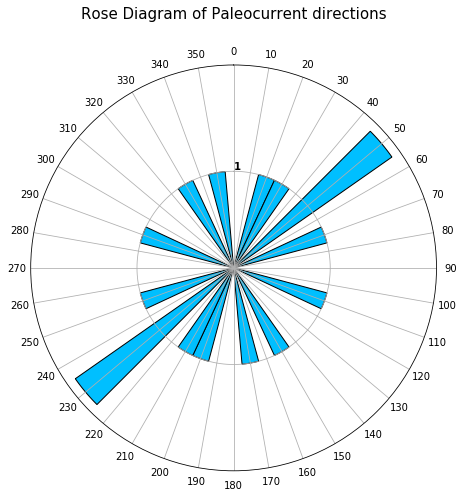

In [55]:
#http://geologyandpython.com/structural_geology.html
import numpy as np
# !pip install mplstereonet
import mplstereonet
import matplotlib.pyplot as plt
data =pd.read_csv('paleocurrent.csv')

bin_edges = np.arange(-5, 366, 10)
strikes=data['dip_direction']
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)
number_of_strikes[0] += number_of_strikes[-1]
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='polar')
ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='deepskyblue', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram of Paleocurrent directions', y=1.10, fontsize=15)

In [41]:
ax.bar??

In [45]:
np.concatenate??